In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [2]:
# reading data
#df =pd.read_csv("F:\datasets\creditcard.csv")
df=pd.read_csv("C:/Users/HP/OneDrive/Desktop/Project/creditcard_csv.csv")
# showing the first five rows
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,'0'
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,'0'
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,'0'
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,'0'
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,'0'


### Understanding the Dataset:

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,5.126845e-16,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000


In [6]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [7]:
df.duplicated().sum()

1081

### Visualization of the dataset:

#### Histograms and Density Plots:

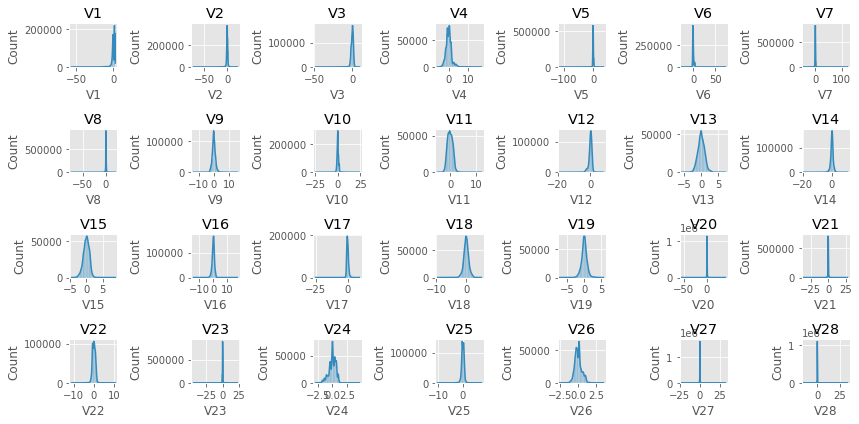

In [10]:
# Plot histograms for V1 to V28 features
plt.figure(figsize=(12, 6))
for i in range(1, 29):
    plt.subplot(4, 7, i)
    sns.histplot(df['V{}'.format(i)], bins=30, kde=True)
    plt.title('V{}'.format(i))
plt.tight_layout()
plt.show()

#### Box Plots:

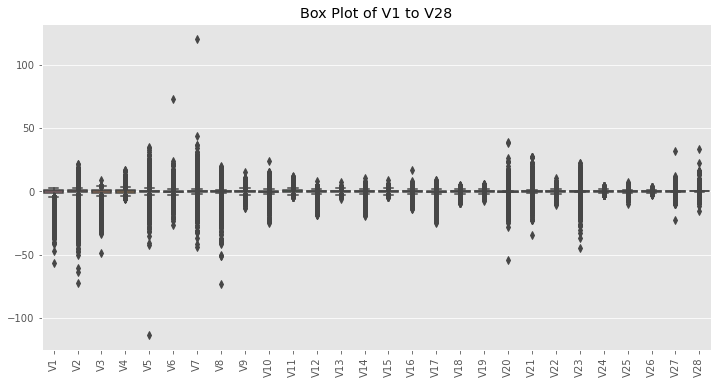

In [11]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.iloc[:, 1:29])
plt.xticks(rotation=90)
plt.title("Box Plot of V1 to V28")
plt.show()

#### Correlation Heatmap:

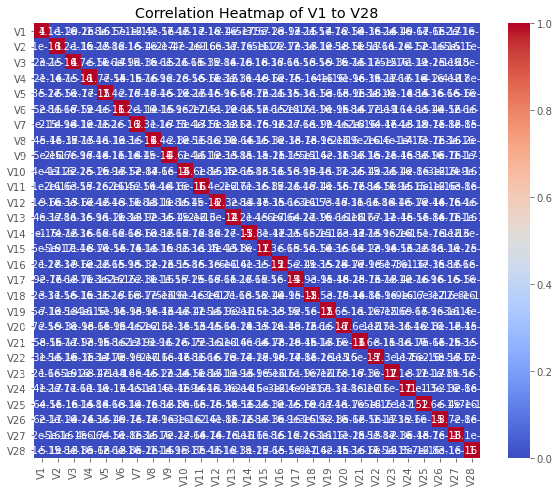

In [12]:
correlation_matrix = df.iloc[:, 1:29].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of V1 to V28")
plt.show()

#### Fraud vs. Non-Fraud Transactions:

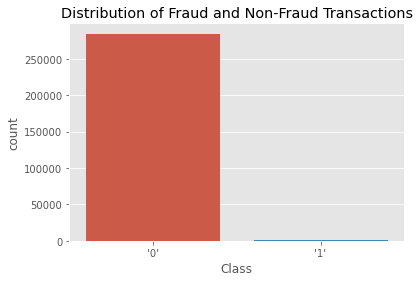

In [13]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Class')
plt.title("Distribution of Fraud and Non-Fraud Transactions")
plt.show()

#### Transaction Amount Distribution:

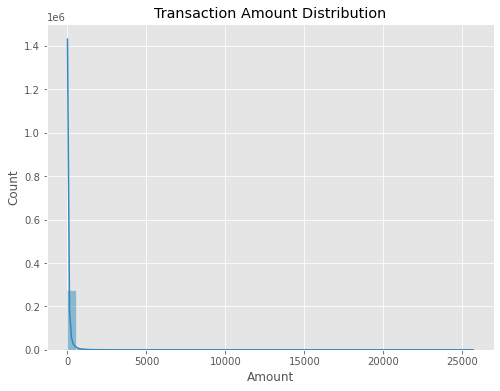

In [14]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Amount'], bins=50, kde=True)
plt.title("Transaction Amount Distribution")
plt.show()

### Model Building:

#### Setting the data for model building:

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,'0'
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,'0'
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,'0'
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,'0'
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,'0'


#### Random Undersampling Method is used to reduce the number of majority class instances:

In [3]:
import pandas as pd

# Convert the entire 'Class' column to string first
df['Class'] = df['Class'].astype(str)

# Now strip the quotes and convert to integer
df['Class'] = df['Class'].str.strip("'").astype(int)

# Separate majority and minority classes
df_majority = df[df.Class == 0]
df_minority = df[df.Class == 1]

# Randomly sample from majority dataset to match the number of minority class
df_majority_downsampled = df_majority.sample(n=len(df_minority), random_state=42)

# Combine majority and minority class DataFrames
df_balanced = pd.concat([df_majority_downsampled, df_minority])

# Shuffle the dataset
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# Now, df_balanced has an equal number of instances of both classes
print(df_balanced['Class'].value_counts())

1    492
0    492
Name: Class, dtype: int64


#### Splitting the data:

In [4]:
from sklearn.model_selection import train_test_split

# Features and Target
X = df.drop('Class', axis=1)  # Features (exclude the 'Class' column)
y = df['Class']  # Target

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)

Training data shape: (227845, 30)
Testing data shape: (56962, 30)


#### Logistic Regression:

Classification Report (Train Data):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.86      0.63      0.73       394

    accuracy                           1.00    227845
   macro avg       0.93      0.82      0.86    227845
weighted avg       1.00      1.00      1.00    227845

Confusion Matrix (Train Data):
[[227409     42]
 [   144    250]]


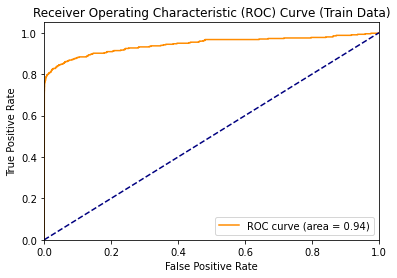

Classification Report (Test Data):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.79      0.49      0.60        98

    accuracy                           1.00     56962
   macro avg       0.89      0.74      0.80     56962
weighted avg       1.00      1.00      1.00     56962

Confusion Matrix (Test Data):
[[56851    13]
 [   50    48]]


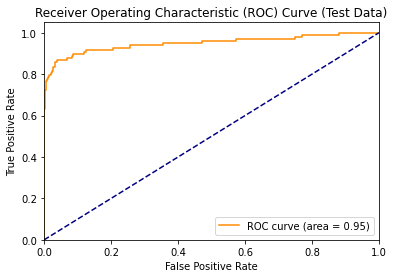

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# Instantiate and train a logistic regression model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Define a function to evaluate the model
def evaluate_model(model, X, y, dataset_type="Test"):
    # Predict
    y_pred = model.predict(X)
    
    # Print a classification report
    print(f"Classification Report ({dataset_type} Data):")
    print(classification_report(y, y_pred))
    
    # Print confusion matrix
    conf_matrix = confusion_matrix(y, y_pred)
    print(f"Confusion Matrix ({dataset_type} Data):")
    print(conf_matrix)

    # Plot ROC curve
    y_prob = model.predict_proba(X)[:, 1]  # Probabilities for the positive class
    fpr, tpr, thresholds = roc_curve(y, y_prob)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic (ROC) Curve ({dataset_type} Data)')
    plt.legend(loc="lower right")
    plt.show()

# Evaluate on training data
evaluate_model(logreg, X_train, y_train, dataset_type="Train")

# Evaluate on testing data
evaluate_model(logreg, X_test, y_test)

#### Decision Tree:

Classification Report (Train Data):
              precision    recall  f1-score   support

           0       1.00      0.96      0.98    227451
           1       0.04      0.97      0.08       394

    accuracy                           0.96    227845
   macro avg       0.52      0.97      0.53    227845
weighted avg       1.00      0.96      0.98    227845

Confusion Matrix (Train Data):
[[218852   8599]
 [    12    382]]


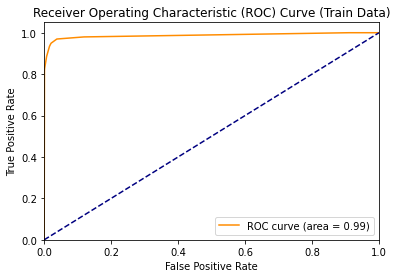

Classification Report (Test Data):
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     56864
           1       0.04      0.86      0.07        98

    accuracy                           0.96     56962
   macro avg       0.52      0.91      0.53     56962
weighted avg       1.00      0.96      0.98     56962

Confusion Matrix (Test Data):
[[54723  2141]
 [   14    84]]


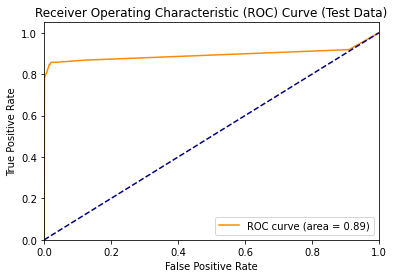

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# Instantiate and train a decision tree model with balanced class weights and max_depth set
tree_clf = DecisionTreeClassifier(class_weight='balanced', max_depth=5, random_state=42)
tree_clf.fit(X_train, y_train)

# Define a function to evaluate the model
def evaluate_model(model, X, y, dataset_type="Test"):
    # Predict
    y_pred = model.predict(X)
    
    # Print a classification report
    print(f"Classification Report ({dataset_type} Data):")
    print(classification_report(y, y_pred))
    
    # Print confusion matrix
    conf_matrix = confusion_matrix(y, y_pred)
    print(f"Confusion Matrix ({dataset_type} Data):")
    print(conf_matrix)

    # Plot ROC curve
    y_prob = model.predict_proba(X)[:, 1]  # Probabilities for the positive class
    fpr, tpr, thresholds = roc_curve(y, y_prob)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic (ROC) Curve ({dataset_type} Data)')
    plt.legend(loc="lower right")
    plt.show()

# Evaluate on training data
evaluate_model(tree_clf, X_train, y_train, dataset_type="Train")

# Evaluate on testing data
evaluate_model(tree_clf, X_test, y_test)

#### Random Forest:

OOB Score: 0.9994
Classification Report (Train Data):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.88      0.98      0.93       394

    accuracy                           1.00    227845
   macro avg       0.94      0.99      0.96    227845
weighted avg       1.00      1.00      1.00    227845

Confusion Matrix (Train Data):
[[227397     54]
 [     8    386]]


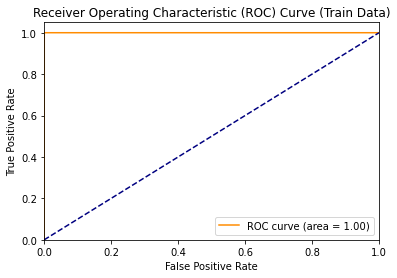

Classification Report (Test Data):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.86      0.83      0.84        98

    accuracy                           1.00     56962
   macro avg       0.93      0.91      0.92     56962
weighted avg       1.00      1.00      1.00     56962

Confusion Matrix (Test Data):
[[56851    13]
 [   17    81]]


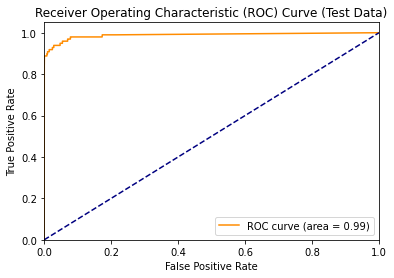

Cross-validation F1-Macro scores: [0.91494595 0.9065128  0.91708116 0.91433081 0.91494595]
Mean CV F1-Macro: 0.9136, Std Dev: 0.0036


In [40]:
from sklearn.model_selection import cross_val_score

# Instantiate and train a modified random forest model
forest_clf = RandomForestClassifier(
    class_weight='balanced',
    n_estimators=200,       
    min_samples_split=20,  # Increased to reduce overfitting
    min_samples_leaf=10,   # Increased to reduce overfitting
    max_depth=15,          # Decreased to reduce complexity
    max_features='sqrt',   
    max_samples=0.8,       
    oob_score=True,        # Out-of-Bag score enabled
    random_state=42
)
forest_clf.fit(X_train, y_train)

print(f"OOB Score: {forest_clf.oob_score_:.4f}")

# Evaluate on training data
evaluate_model(forest_clf, X_train, y_train, dataset_type="Train")

# Evaluate on testing data
evaluate_model(forest_clf, X_test, y_test)

# Cross-validation to ensure stability and reduce overfitting
cv_scores = cross_val_score(forest_clf, X_train, y_train, cv=5, scoring='f1_macro')
print(f"Cross-validation F1-Macro scores: {cv_scores}")
print(f"Mean CV F1-Macro: {cv_scores.mean():.4f}, Std Dev: {cv_scores.std():.4f}")

#### Naive Bayes Model:

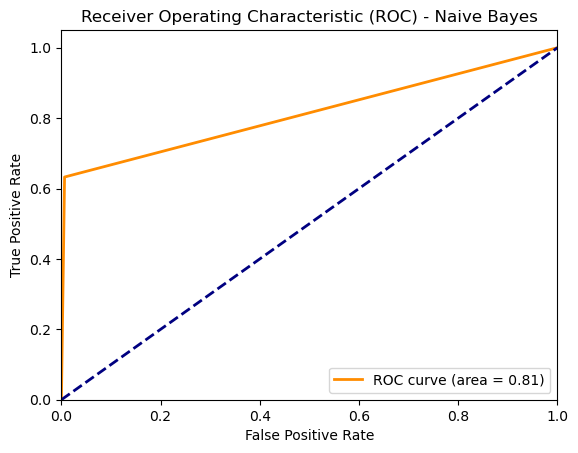

Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56864
           1       0.15      0.63      0.24        98

    accuracy                           0.99     56962
   macro avg       0.57      0.81      0.62     56962
weighted avg       1.00      0.99      1.00     56962

Naive Bayes Confusion Matrix:
[[56502   362]
 [   36    62]]
Naive Bayes ROC AUC Score:
0.8131434974102191


In [8]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Create a Naive Bayes model
naive_bayes_model = GaussianNB()

# Train the model on the training data
naive_bayes_model.fit(X_train, y_train)

# Make predictions on the test data
naive_bayes_predictions = naive_bayes_model.predict(X_test)

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, naive_bayes_predictions)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Naive Bayes')
plt.legend(loc='lower right')
plt.show()

# Evaluate the model
print("Naive Bayes Classification Report:")
print(classification_report(y_test, naive_bayes_predictions))
print("Naive Bayes Confusion Matrix:")
print(confusion_matrix(y_test, naive_bayes_predictions))
print("Naive Bayes ROC AUC Score:")
print(roc_auc_score(y_test, naive_bayes_predictions))

#### LSTM Model:

Epoch 1/10
7121/7121 [==============================] - 77s 9ms/step - loss: 0.0164 - accuracy: 0.9983
Epoch 2/10
7121/7121 [==============================] - 66s 9ms/step - loss: 0.0026 - accuracy: 0.9995
Epoch 3/10
7121/7121 [==============================] - 67s 9ms/step - loss: 0.0023 - accuracy: 0.9995
Epoch 4/10
7121/7121 [==============================] - 65s 9ms/step - loss: 0.0020 - accuracy: 0.9995
Epoch 5/10
7121/7121 [==============================] - 65s 9ms/step - loss: 0.0018 - accuracy: 0.9996
Epoch 6/10
7121/7121 [==============================] - 66s 9ms/step - loss: 0.0017 - accuracy: 0.9996
Epoch 7/10
7121/7121 [==============================] - 65s 9ms/step - loss: 0.0016 - accuracy: 0.9996
Epoch 8/10
7121/7121 [==============================] - 66s 9ms/step - loss: 0.0014 - accuracy: 0.9996
Epoch 9/10
7121/7121 [==============================] - 66s 9ms/step - loss: 0.0013 - accuracy: 0.9997
Epoch 10/10
1781/1781 [==============================] - 12s 5ms/step


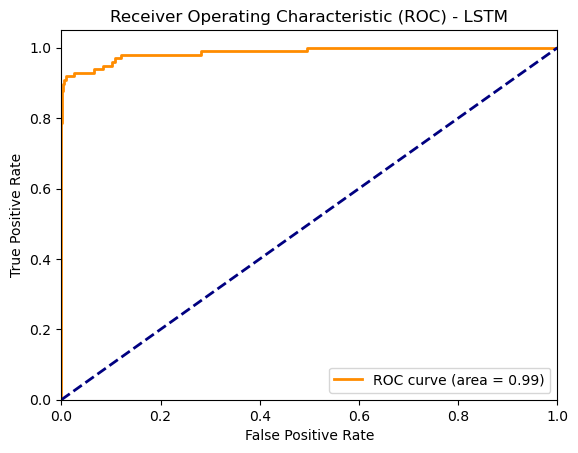

LSTM Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.90      0.73      0.81        98

    accuracy                           1.00     56962
   macro avg       0.95      0.87      0.90     56962
weighted avg       1.00      1.00      1.00     56962

LSTM Confusion Matrix:
[[56856     8]
 [   26    72]]
LSTM ROC AUC Score:
0.8672765955003272


In [9]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Create an LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(units=50, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
lstm_model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
lstm_model.fit(X_train_lstm, y_train, epochs=10, batch_size=32)

# Make predictions on the test data
lstm_predictions = lstm_model.predict(X_test_lstm)

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, lstm_predictions)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - LSTM')
plt.legend(loc='lower right')
plt.show()

# Evaluate the model
lstm_predictions_binary = [1 if x > 0.5 else 0 for x in lstm_predictions]
print("LSTM Classification Report:")
print(classification_report(y_test, lstm_predictions_binary))
print("LSTM Confusion Matrix:")
print(confusion_matrix(y_test, lstm_predictions_binary))
print("LSTM ROC AUC Score:")
print(roc_auc_score(y_test, lstm_predictions_binary))

#### Neural Network:

Epoch 1/10
7121/7121 [==============================] - 50s 6ms/step - loss: 0.0093 - accuracy: 0.9981
Epoch 2/10
7121/7121 [==============================] - 47s 7ms/step - loss: 0.0041 - accuracy: 0.9993
Epoch 3/10
7121/7121 [==============================] - 46s 7ms/step - loss: 0.0036 - accuracy: 0.9993
Epoch 4/10
7121/7121 [==============================] - 47s 7ms/step - loss: 0.0035 - accuracy: 0.9994
Epoch 5/10
7121/7121 [==============================] - 45s 6ms/step - loss: 0.0033 - accuracy: 0.9994
Epoch 6/10
7121/7121 [==============================] - 45s 6ms/step - loss: 0.0032 - accuracy: 0.9994
Epoch 7/10
7121/7121 [==============================] - 46s 6ms/step - loss: 0.0032 - accuracy: 0.9994
Epoch 8/10
7121/7121 [==============================] - 46s 6ms/step - loss: 0.0031 - accuracy: 0.9994
Epoch 9/10
7121/7121 [==============================] - 46s 6ms/step - loss: 0.0031 - accuracy: 0.9994
Epoch 10/10
1781/1781 [==============================] - 8s 4ms/step


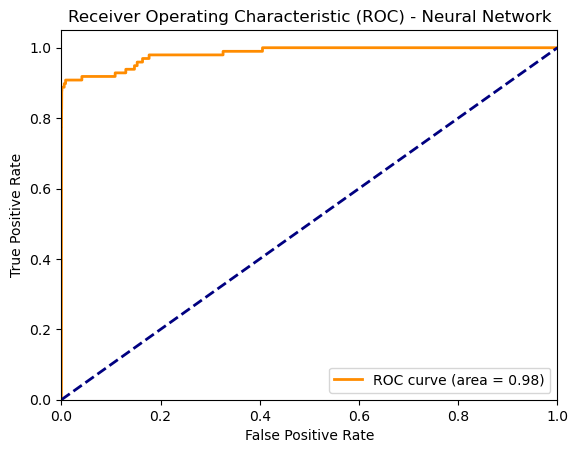

Neural Network Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.90      0.73      0.81        98

    accuracy                           1.00     56962
   macro avg       0.95      0.87      0.90     56962
weighted avg       1.00      1.00      1.00     56962

Neural Network Confusion Matrix:
[[56856     8]
 [   26    72]]
Neural Network ROC AUC Score:
0.8672765955003272


In [11]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Standardize the features
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

# Create a neural network model
nn_model = Sequential()
nn_model.add(Dense(units=64, input_dim=X_train_std.shape[1], activation='relu'))
nn_model.add(Dropout(0.5))
nn_model.add(Dense(units=32, activation='relu'))
nn_model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
nn_model.fit(X_train_std, y_train, epochs=10, batch_size=32)

# Make predictions on the test data
nn_predictions = nn_model.predict(X_test_std)

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, nn_predictions)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Neural Network')
plt.legend(loc='lower right')
plt.show()

# Evaluate the model
nn_predictions_binary = [1 if x > 0.5 else 0 for x in nn_predictions]
print("Neural Network Classification Report:")
print(classification_report(y_test, nn_predictions_binary))
print("Neural Network Confusion Matrix:")
print(confusion_matrix(y_test, nn_predictions_binary))
print("Neural Network ROC AUC Score:")
print(roc_auc_score(y_test, nn_predictions_binary))